# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space. It does this by identifying the directions (principal components) in which the variance of the data is maximized. PCA is widely used in exploratory data analysis, noise reduction, and feature extraction.

**Applications of PCA**:
- Reducing the dimensionality of large datasets while preserving most of the variance.
- Visualizing high-dimensional data in 2D or 3D plots.
- Preprocessing step before applying other machine learning algorithms to reduce computational cost and mitigate multicollinearity.

**Steps to perform PCA**:
1. **Standardize the Data**: Since PCA is affected by the scale of the data, it is essential to standardize the data to have a mean of 0 and a standard deviation of 1.
2. **Compute the Covariance Matrix**: Calculate the covariance matrix to understand how the variables of the input data are varying from the mean with respect to each other.
3. **Calculate Eigenvalues and Eigenvectors**: Derive the eigenvalues and eigenvectors from the covariance matrix. The eigenvectors determine the direction of the new feature space, while the eigenvalues determine their magnitude.
4. **Sort Eigenvalues and Select Principal Components**: Rank the eigenvalues in descending order and choose the top `k` eigenvalues. The corresponding eigenvectors form the principal components.
5. **Transform the Data**: Project the original data onto the `k` principal components to get the reduced-dimensi transformation.


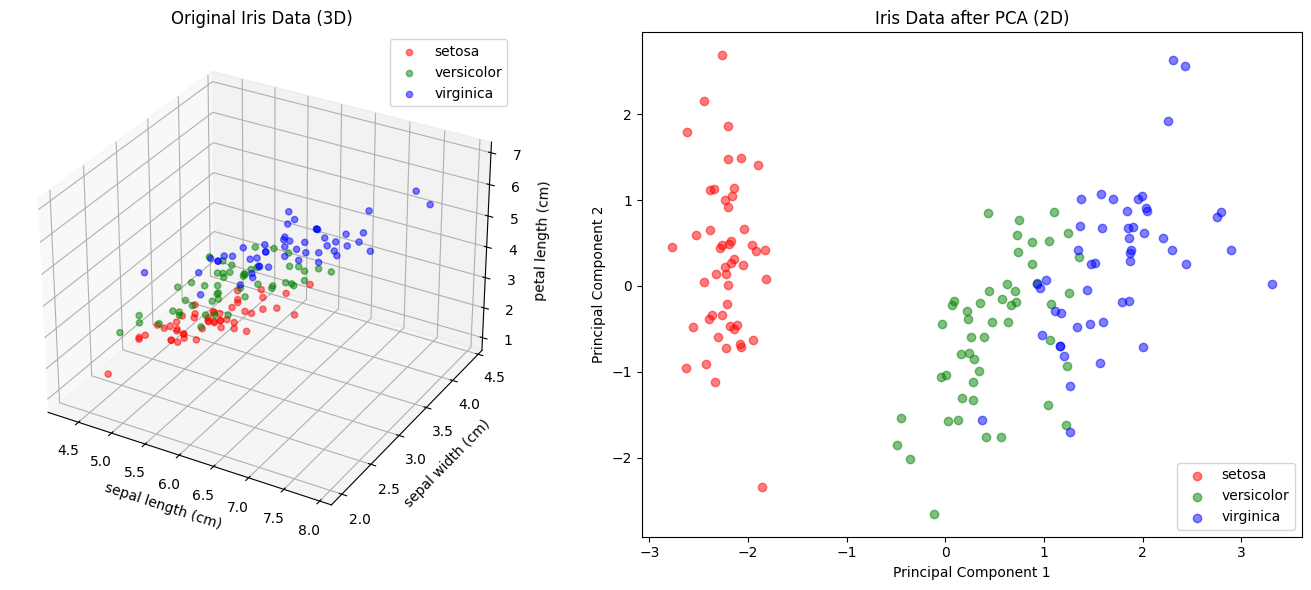

Explained variance by PC1: 0.73
Explained variance by PC2: 0.23


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the original 3D data
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection='3d')
for target, color, label in zip(np.unique(y), ['r', 'g', 'b'], target_names):
    ax.scatter(X[y == target, 0], X[y == target, 1], X[y == target, 2], color=color, label=label, alpha=0.5)
plt.title('Original Iris Data (3D)')
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
ax.legend()

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the transformed 2D data
ax2 = fig.add_subplot(122)
for target, color, label in zip(np.unique(y), ['r', 'g', 'b'], target_names):
    ax2.scatter(X_pca[y == target, 0], X_pca[y == target, 1], color=color, label=label, alpha=0.5)
plt.title('Iris Data after PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by PC1: {explained_variance[0]:.2f}')
print(f'Explained variance by PC2: {explained_variance[1]:.2f}')


# Conclusion

In this example, we applied PCA to the Iris dataset to reduce its dimensionality from four features to two principal components. This allowed us to visualize the dataset in 2D while preserving most of its variance.

Key points:
- **Dimensionality Reduction**: PCA reduced the data from 4 dimensions to 2.
- **Data Visualization**: We visualized the data in 3D and 2D, making it easier to see the patterns and clusters.
- **Explained Variance**: The first two principal components captured a significant portion of the variance in the data.

PCA is a useful tool for simplifying data and making it easier to visualize and analyze.
